# Regularization

* requires features to be scaled before training
* we don't regularize intercept
* only used to train the model not for prediction

In [1]:
import sys
assert sys.version_info >= (3,5)

In [2]:
from sklearn import __version__ as skversion
assert skversion >= "1"

In [3]:
skversion

'1.0.1'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style='darkgrid')

In [5]:
X = 5 *  np.random.rand(1000,1) - 3
y = 0.9* X**3 + 0.5* X**2 + X + 2 + np.random.randn(1000,1)

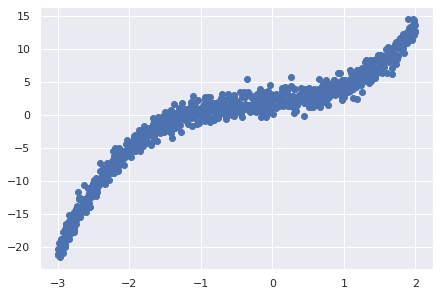

In [6]:
fig,axes = plt.subplots(1,layout='constrained')
axes.scatter(X,y)
plt.show()

# Ridge regression (Tikhonov regularization)

In [7]:
from sklearn.linear_model import Ridge

using normal equation <br>

$\hat\theta = inv(X^T\cdot X + \alpha A)\cdot X^T \cdot y $

In [8]:
ridge_reg = Ridge(alpha=0.00001,solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[8.77381931]])

In [9]:
cholesky_pred = ridge_reg.predict(X)

using stochastic gradient descent

In [10]:
from sklearn.linear_model import SGDRegressor

In [11]:
sgd_reg = SGDRegressor(loss="squared_error", penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([8.73893158])

## Lasso Regression

least absolute shrinkage and selection operator  (LASSO)
* automatically performs feature selection
* outputs a sparse model (with a few nonzero weights)

In [12]:
from sklearn.linear_model import Lasso

In [13]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([8.7640692])

In [14]:
lasso_pred = lasso_reg.predict(X)

## Elastic Net (cross entropy minimization)

In [15]:
from sklearn.linear_model import ElasticNet

In [16]:
elastic_net = ElasticNet(alpha=0.00001,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([8.77379245])

In [17]:
elastic_pred = elastic_net.predict(X)

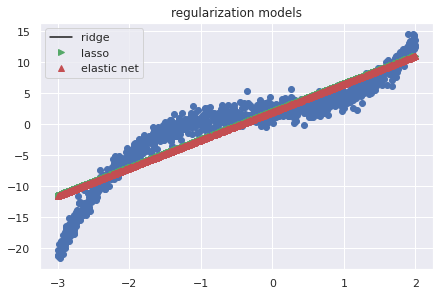

In [18]:
fig,axes = plt.subplots(1,layout='constrained')
axes.scatter(X,y)
axes.plot(X,cholesky_pred, 'k-', label="ridge")
axes.plot(X,lasso_pred,'g>', label="lasso")
axes.plot(X,elastic_pred, 'r^', label="elastic net")
plt.legend()
plt.title('regularization models')
plt.show()

## Early stopping ( "free lunch")

In [19]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [20]:
from sklearn.base import clone

In [21]:
X_train, X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
poly_scale = Pipeline((
    ('poly_ft',PolynomialFeatures(degree=3,include_bias=False)),
    ('scale_fg',StandardScaler())
    ))

In [23]:
X_train_poly_scaled = poly_scale.fit_transform(X_train)
X_val_poly_scaled = poly_scale.transform(X_val)

In [24]:
sgd_reg = SGDRegressor(loss="squared_error", max_iter=1,warm_start=True, penalty=None,learning_rate="constant", eta0=0.0005)


In [25]:
min_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict,y_val)
    if val_error < min_val_error:
        min_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

In [26]:
best_model

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             warm_start=True)

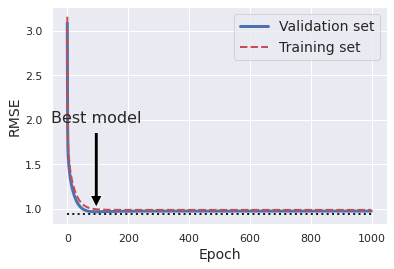

In [27]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 999
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.show()